# Imagen Demo

In [1]:
function y = m_padding(x,iii,jjj)

%%%%%%%%%%%% Zero-Padding Parcialmente implementado

[r_i, r_j] = size(x);
alt_r_i = floor((iii - r_i) / 2);
alt_r_j = floor((jjj - r_j) / 2);

%%%% Añadir para impares

y = [zeros(r_i, alt_r_j) x zeros(r_i, alt_r_j)];
y = [zeros(alt_r_i, jjj); y; zeros(alt_r_i, jjj)];

end

In [2]:
function y = m_gradiente(x, modifier)

    [filas, columnas] = size(x);
    y = zeros(filas, columnas);
    ancho = 10;
    max_val_ref = 255;
    
    scale = [2:ancho+1];
    scale = 1 ./ scale;
    scale = floor(max_val_ref .* scale);
    scale = scale + modifier;
    rev_scale = fliplr(scale);
    
    for index = [1: (filas * columnas)]
        x(index);
        if x(index) == max_val_ref
            ref = mod(index,filas);
            if ref == 0
                ref = filas;
            end
            carry = [ref - ancho: ref + ancho];
            carry1 = carry(carry >= 1);
            carry = carry1(carry1 <= filas);
            
            
            id_a = carry(carry < ref) - ref + index;
            id_b = carry(carry > ref) - ref + index;
            
            
            y(id_a) = rev_scale(length(rev_scale) - (length(id_a) - 1) :end);
            y(index) = max_val_ref;
            y(id_b) = scale(1:length(id_b));
                        
        end

    end
    
end

In [3]:
function circle = m_circulo(radio)

circle = zeros(radio, radio);

x = [1:radio];
y = floor(sqrt(radio^2 - x.^2));

ids = x * radio + y;

circle(ids) = 1;

circle = [rot90(circle); circle];
circle = [rot90(rot90(circle)) circle];

end

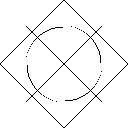

In [4]:
img_size = 128;
IMG = zeros(img_size,img_size,3);
BASE = zeros(img_size, img_size, 3);

trng_l = floor(img_size / 2);
trng_d = eye(trng_l,trng_l);

rombo = [ rot90(trng_d) trng_d; trng_d rot90(trng_d)];

rad = floor(img_size * 0.6);
circulo = m_circulo(floor(rad/2));


band_l = eye(rad,rad);
banda =  ( band_l + rot90(rot90(band_l))');
banda =  banda + ( band_l + rot90(band_l));

%%% Agregando padding

p_rombo = m_padding(rombo, img_size, img_size);

p_circulo = m_padding(circulo, img_size, img_size);

p_banda = m_padding(banda, img_size, img_size);

IMG = IMG + p_rombo + p_circulo + p_banda;
IMG = 255 - uint8(255 * IMG);

IMG = IMG(:,:,1);
imshow(IMG);

In [5]:
size(IMG)

ans =

   128   128



# Funciones Adicionales

## Padding - Reflejo

In [6]:
function  output = ReflectImage(matrix, radio);
[fMat,cMat]=size(matrix);

fTotal = fMat + 2 * radio;
cTotal = cMat + 2 * radio;

for i=1:fTotal
    for j=1:cTotal
        if i>radio && i<=fTotal-radio && j>radio && j<=cTotal-radio
            matrixReflect(i,j) = matrix(i-radio,j-radio);
        else 
            matrixReflect(i,j) = 255;
        end
    end
end

output = matrixReflect;
end

In [7]:
function  output = ReductImage(matrix, radio);
[fTotal,cTotal]=size(matrix);

fMat = fTotal - radio*2;
cMat = cTotal - radio*2;



%for i=1:fTotal
%    for j=1:cTotal
%        if i>radio && i<=fTotal-radio && j>radio && j<=cTotal-radio
%            matrixReduct(i-radio,j-radio) = matrix(i,j);
%        end
%    end
%end

for i=1:fMat
    for j=1:cMat
        matrixReduct(i,j) = matrix(i+radio,j+radio);
    end
end

output = matrixReduct;
end

In [5]:
function hist=Histograma(imagen)
%El histograma va desde los tonos negros hasta tonos blancos.
imD = imagen;
[f,c]=size(imD);
 
for i=1:256
    h(i) = 0;
end
 
for i=1:f
       for j=1:c
           k = imD(i,j);
           h(k+1) = h(k+1)+1;
       end
end
%Plotear el Histograma
%plot(h);
hist = h; 
end

In [4]:
function output = Binarization(imD,threshold);

[fBin,cBin]=size(imD);

for i=1:fBin
    for j=1:cBin
        if imD(i,j)<=threshold
            imageBin(i,j) = 0;
        else
            imageBin(i,j) = 255;
        end
    end
end

output = imageBin;
end

In [3]:
function salida = otsuMethod(imD);

[fOtsu,cOtsu]=size(imD);
histogram = Histograma(imD);

n = fOtsu*cOtsu;


%frecuencia de cada pixel.
for i=1:256
    f(i) = histogram(i)/n;
end

mayor = 0;

for i=1:256
    if f(i) ~= 0
        w1 = 0;
        w2 = 0;
        u1 = 0;
        u2 = 0;
        ut = 0;
        sigma = 0;
        %W1
        for j=1:i
            w1 = w1 + (f(j));
        end
        %U1
        for j=1:i
            u1 = u1 + (j*(f(j)/w1));
        end
        %W2
        for j=i+1:256
            w2 = w2 + (f(j));
        end 
        %U2
        for j=i+1:256
            u2 = u2 + (j*(f(j)/w2));
        end

        ut = (w1*u1)+(w2*u2);
        sigma = (w1*(u1-ut)^2)+(w2*(u2-ut)^2);

        if(mayor < sigma)
            mayor = sigma;
            umbral = i;
        end
    end
end

salida = umbral;
end

# Generador de Elementos Estructurales

## Erosion

In [11]:
function output = ErosionMatriz(templateBin, radio, name_SE);

%templateBin = [  255 255 255 255 255 255 255 255 255 255;
%            255 0 0 0 0 0 0 0 0 255;
%            255 0 0 0 0 0 0 0 0 255;
%            255 0 0 0 0 0 0 0 0 255;
%            255 0 0 0 255 255 255 255 255 255;
%            255 0 0 0 255 255 255 255 255 255;
%            255 0 0 0 0 0 0 0 0 255;
%            255 0 0 0 0 0 0 0 0 255;
%            255 0 0 0 0 0 0 0 0 255;
%            255 255 255 255 255 255 255 255 255 255];
        
templateBinR = ReflectImage(templateBin, radio);
[fEro,cEro]=size(templateBinR);

radio__ = round(radio/2)-1;

for i=1:fEro
    for j=1:cEro
        matrixErosion(i,j) = 255;
    end
end

if strcmp(name_SE, 'cruz')
   for i=1:fEro-radio+1
        for j=1:cEro-radio+1
            matrixEva = templateBinR(i:i+radio-1,j:j+radio-1);
            band = SE_Cross_Erosion(matrixEva,radio);

            if band == true
                matrixErosion(i+radio__,j+radio__) = 0;
            end
        end
   end
   matrixErosion = ReductImage(matrixErosion,radio);
elseif strcmp(name_SE, 'cuadrado')
        for i=1:fEro-radio+1
            for j=1:cEro-radio+1
                matrixEva = templateBinR(i:i+radio-1,j:j+radio-1);
                band = SE_Square_Erosion(matrixEva,radio);
                
                if band == true
                    matrixErosion(i+radio__,j+radio__) = 0;
                end
            end
        end
        matrixErosion = ReductImage(matrixErosion,radio);
elseif strcmp(name_SE, 'lineaV')
        for i=1:fEro-radio+1
            for j=1:cEro
                matrixEva = templateBinR(i:i+radio-1,j:j);            
                band = SE_VerticalLine_Erosion(matrixEva,radio);
                
                if band == true
                    matrixErosion(i+radio__,j) = 0;
                end
                
            end
        end    
        matrixErosion = ReductImage(matrixErosion,radio);
elseif strcmp(name_SE, 'lineaH')
        for i=1:fEro
            for j=1:cEro-radio+1
                matrixEva = templateBinR(i:i,j:j+radio-1);            
                band = SE_HorizontalLine_Erosion(matrixEva,radio);
                
                if band == true
                    matrixErosion(i,j+radio__) = 0;
                end
                
            end
        end
        matrixErosion = ReductImage(matrixErosion,radio);
end

output = matrixErosion;
end

# Dilatacion

In [12]:
function output = DilatacionMatriz(templateBin, radio, name_SE);

%templateBin = [  255 255 255 255 255 255 255 255 255 255;
%            255 255 255 255 255 255 255 255 255 255;
%            255 255 0 0 0 0 0 0 255 255;
%            255 255 0 255 255 255 255 255 255 255;
%            255 255 0 255 255 255 255 255 255 255;
%            255 255 0 255 255 255 255 255 255 255;
%            255 255 0 255 255 255 255 255 255 255;
%            255 255 0 0 0 0 0 0 255 255;
%            255 255 255 255 255 255 255 255 255 255;
%            255 255 255 255 255 255 255 255 255 255];

templateBinR = ReflectImage(templateBin, radio);
[fDil,cDil]=size(templateBinR)

for i=1:fDil
    for j=1:cDil
        matrixDilated(i,j) = 255;
    end
end

if strcmp(name_SE, 'cruz')
   for i=1:fDil
        for j=1:cDil
            if templateBinR(i,j) == 0
                matrixDilated = SE_Cross_Dilatation(matrixDilated,radio,i,j);
            end
        end
   end
   matrixDilated = ReductImage(matrixDilated,radio);
elseif strcmp(name_SE, 'cuadrado')
        for i=1:fDil
            for j=1:cDil
                if templateBinR(i,j) == 0
                    matrixDilated = SE_Square_Dilatation(matrixDilated,radio,i,j);
                end
            end
        end
        matrixDilated = ReductImage(matrixDilated,radio);
elseif strcmp(name_SE, 'lineaV')
        for i=1:fDil-radio+1
            for j=1:cDil
                if templateBinR(i,j) == 0
                    matrixDilated = SE_VerticalLine_Dilatation(matrixDilated,radio,i,j);
                end
            end
        end    
        matrixDilated = ReductImage(matrixDilated,radio);
elseif strcmp(name_SE, 'lineaH')
         for i=1:fDil-radio+1
            for j=1:cDil
                if templateBinR(i,j) == 0
                    matrixDilated = SE_HorizontalLine_Dilatation(matrixDilated,radio,i,j);
                end
            end
        end    
        matrixDilated = ReductImage(matrixDilated,radio);
end

output = matrixDilated;
end

---
---


# Operaciones Morfologicas

## Erosion

In [13]:
function Erosion(image, radio, name_SE);

threshold = otsuMethod(image);
templateBin = Binarization(image, threshold);
% templateBin = image;

%templateBin = [  255 255 255 255 255 255 255 255 255 255;
%            255 0 0 0 0 0 0 0 0 255;
%            255 0 0 0 0 0 0 0 0 255;
%            255 0 0 0 0 0 0 0 0 255;
%            255 0 0 0 255 255 255 255 255 255;
%            255 0 0 0 255 255 255 255 255 255;
%            255 0 0 0 0 0 0 0 0 255;
%            255 0 0 0 0 0 0 0 0 255;
%            255 0 0 0 0 0 0 0 0 255;
%            255 255 255 255 255 255 255 255 255 255];
        
templateBinR = ReflectImage(templateBin, radio);
[fEro,cEro]=size(templateBinR);

radio__ = round(radio/2)-1;

for i=1:fEro
    for j=1:cEro
        matrixErosion(i,j) = 255;
    end
end

if strcmp(name_SE, 'cruz')
   for i=1:fEro-radio+1
        for j=1:cEro-radio+1
            matrixEva = templateBinR(i:i+radio-1,j:j+radio-1);
            band = SE_Cross_Erosion(matrixEva,radio);

            if band == true
                matrixErosion(i+radio__,j+radio__) = 0;
            end
        end
   end
   matrixErosion = ReductImage(matrixErosion,radio);
elseif strcmp(name_SE, 'cuadrado')
        for i=1:fEro-radio+1
            for j=1:cEro-radio+1
                matrixEva = templateBinR(i:i+radio-1,j:j+radio-1);
                band = SE_Square_Erosion(matrixEva,radio);
                
                if band == true
                    matrixErosion(i+radio__,j+radio__) = 0;
                end
            end
        end
        matrixErosion = ReductImage(matrixErosion,radio);
elseif strcmp(name_SE, 'lineaV')
        for i=1:fEro-radio+1
            for j=1:cEro
                matrixEva = templateBinR(i:i+radio-1,j:j);            
                band = SE_VerticalLine_Erosion(matrixEva,radio);
                
                if band == true
                    matrixErosion(i+radio__,j) = 0;
                end
                
            end
        end    
        matrixErosion = ReductImage(matrixErosion,radio);
elseif strcmp(name_SE, 'lineaH')
        for i=1:fEro
            for j=1:cEro-radio+1
                matrixEva = templateBinR(i:i,j:j+radio-1);            
                band = SE_HorizontalLine_Erosion(matrixEva,radio);
                
                if band == true
                    matrixErosion(i,j+radio__) = 0;
                end
                
            end
        end
        matrixErosion = ReductImage(matrixErosion,radio);
end


imageErosion = uint8(matrixErosion);
imageBin = uint8(templateBin);

figure
    subplot(1,3,1); imshow(image); title('Imagen Normal.')
    subplot(1,3,2); imshow(imageBin); title('Binarizacion.')    
    subplot(1,3,3); imshow(imageErosion); title('Erosion')
whos image
end

## Dilatacion

In [14]:
function Dilatacion(image, radio, name_SE);

threshold = otsuMethod(image);
templateBin = Binarization(image, threshold);
% templateBin = image;

%templateBin = [  255 255 255 255 255 255 255 255 255 255;
%            255 255 255 255 255 255 255 255 255 255;
%            255 255 0 0 0 0 0 0 255 255;
%            255 255 0 255 255 255 255 255 255 255;
%            255 255 0 255 255 255 255 255 255 255;
%            255 255 0 255 255 255 255 255 255 255;
%            255 255 0 255 255 255 255 255 255 255;
%            255 255 0 0 0 0 0 0 255 255;
%            255 255 255 255 255 255 255 255 255 255;
%            255 255 255 255 255 255 255 255 255 255];

templateBinR = ReflectImage(templateBin, radio);
[fDil,cDil]=size(templateBinR)

for i=1:fDil
    for j=1:cDil
        matrixDilated(i,j) = 255;
    end
end

if strcmp(name_SE, 'cruz')
   for i=1:fDil
        for j=1:cDil
            if templateBinR(i,j) == 0
                matrixDilated = SE_Cross_Dilatation(matrixDilated,radio,i,j);
            end
        end
   end
   matrixDilated = ReductImage(matrixDilated,radio);
elseif strcmp(name_SE, 'cuadrado')
        for i=1:fDil
            for j=1:cDil
                if templateBinR(i,j) == 0
                    matrixDilated = SE_Square_Dilatation(matrixDilated,radio,i,j);
                end
            end
        end
        matrixDilated = ReductImage(matrixDilated,radio);
elseif strcmp(name_SE, 'lineaV')
        for i=1:fDil-radio+1
            for j=1:cDil
                if templateBinR(i,j) == 0
                    matrixDilated = SE_VerticalLine_Dilatation(matrixDilated,radio,i,j);
                end
            end
        end    
        matrixDilated = ReductImage(matrixDilated,radio);
elseif strcmp(name_SE, 'lineaH')
         for i=1:fDil-radio+1
            for j=1:cDil
                if templateBinR(i,j) == 0
                    matrixDilated = SE_HorizontalLine_Dilatation(matrixDilated,radio,i,j);
                end
            end
        end    
        matrixDilated = ReductImage(matrixDilated,radio);
end

imageDilated = uint8(matrixDilated);
imageBin = uint8(templateBin);

figure
    subplot(1,3,1); imshow(image); title('Imagen Normal.')
    subplot(1,3,2); imshow(imageBin); title('Binarizacion.')    
    subplot(1,3,3); imshow(imageDilated); title('Dilatacion.')
whos image
end

## Cierre

In [15]:
function Cierre(image, radio, name_SE);

threshold = otsuMethod(image);
templateBin = Binarization(image, threshold);
% templateBin = image;

[fEro,cEro] = size(templateBin);

for i=1:fEro
    for j=1:cEro
        matrixErosion(i,j) = 255;
        matrixDilatacion(i,j) = 255;
    end
end

%DILATACION
matrixDilatacion = DilatacionMatriz(templateBin, radio, name_SE);

%EROSION
matrixErosion = ErosionMatriz(matrixDilatacion, radio, name_SE);


imageErosion = uint8(matrixErosion);
imageDilatacion = uint8(matrixDilatacion);
imageBin = uint8(templateBin);

figure
    subplot(1,3,1); imshow(image); title('Imagen Normal.')
    subplot(1,3,2); imshow(imageBin); title('Binarizacion.')    
    subplot(1,3,3); imshow(imageErosion); title('Cierre')
whos image
end

## Apertura

In [16]:
function Apertura(image, radio, name_SE);

threshold = otsuMethod(image);
templateBin = Binarization(image, threshold);
% templateBin = image;

[fEro,cEro]=size(templateBin);

for i=1:fEro
    for j=1:cEro
        matrixErosion(i,j) = 255;
        matrixDilatacion(i,j) = 255;
    end
end

%EROSION
matrixErosion = ErosionMatriz(templateBin, radio, name_SE);

%DILATACION
matrixDilatacion = DilatacionMatriz(matrixErosion, radio, name_SE);

imageErosion = uint8(matrixErosion);
imageDilatacion = uint8(matrixDilatacion);
imageBin = uint8(templateBin);

figure
    subplot(1,4,1); imshow(image); title('Imagen Normal.')
    subplot(1,4,2); imshow(imageBin); title('Binarizacion.')    
    subplot(1,4,3); imshow(imageErosion); title('Erosion')
    subplot(1,4,4); imshow(imageDilatacion); title('Dilatacion')
whos image
end

# DEMOS - Pruebas de funcionalidad

    otsuMethod at line 38 column 16
    Dilatacion at line 3 column 11
fDil =  138
cDil =  138
Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
    f   image     128x128                    16384  uint8

Total is 16384 elements using 16384 bytes



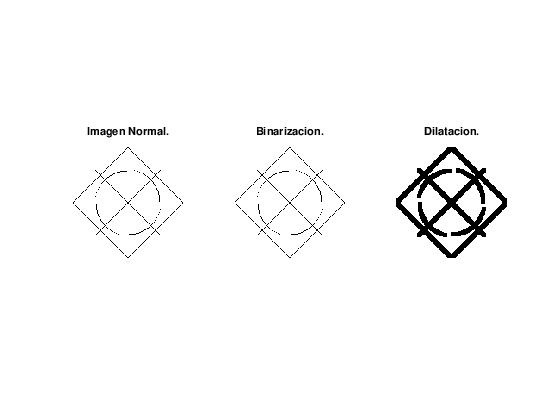

In [26]:
Dilatacion(IMG, 5, 'cuadrado')

    otsuMethod at line 38 column 16
    Erosion at line 3 column 11
Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
    f   image     128x128                    16384  uint8

Total is 16384 elements using 16384 bytes



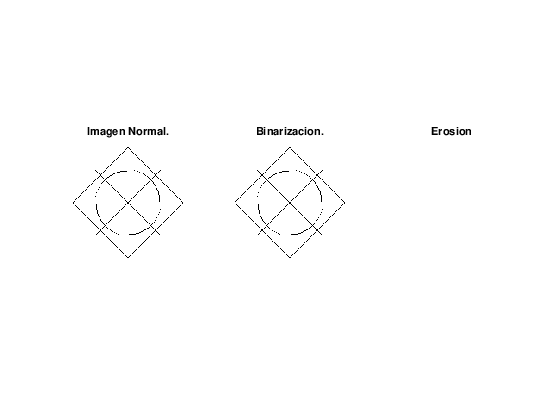

In [27]:
Erosion(IMG, 5, 'cuadrado')

    otsuMethod at line 38 column 16
    Dilatacion at line 3 column 11
fDil =  148
cDil =  148
Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
    f   image     128x128                    16384  uint8

Total is 16384 elements using 16384 bytes



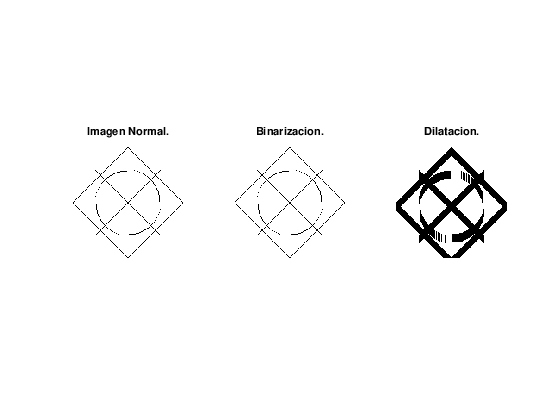

In [28]:
Dilatacion(IMG, 10, 'lineaV')

    otsuMethod at line 38 column 16
    Erosion at line 3 column 11
Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
    f   image     128x128                    16384  uint8

Total is 16384 elements using 16384 bytes



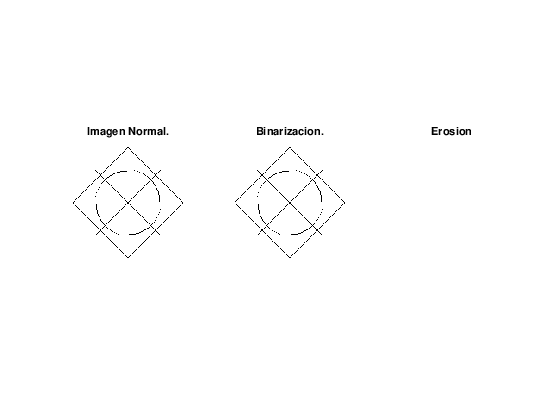

In [29]:
Erosion(IMG, 5, 'lineaV')

    otsuMethod at line 38 column 16
    Dilatacion at line 3 column 11
fDil =  138
cDil =  138
Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
    f   image     128x128                    16384  uint8

Total is 16384 elements using 16384 bytes



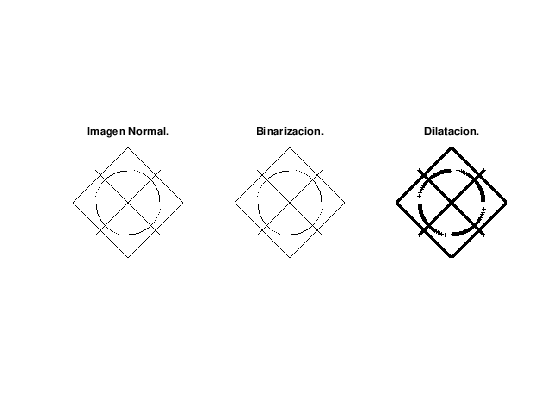

In [30]:
Dilatacion(IMG, 5, 'cruz')

    otsuMethod at line 38 column 16
    Erosion at line 3 column 11
Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
    f   image     128x128                    16384  uint8

Total is 16384 elements using 16384 bytes



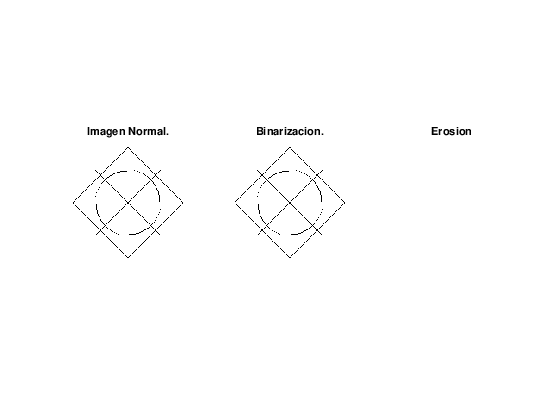

In [31]:
Erosion(IMG, 7, 'cruz')

In [33]:
% Cierre(IMG, 27, 'cruz')

    otsuMethod at line 38 column 16
    Erosion at line 3 column 11
Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
    f   image     128x128                    16384  uint8

Total is 16384 elements using 16384 bytes



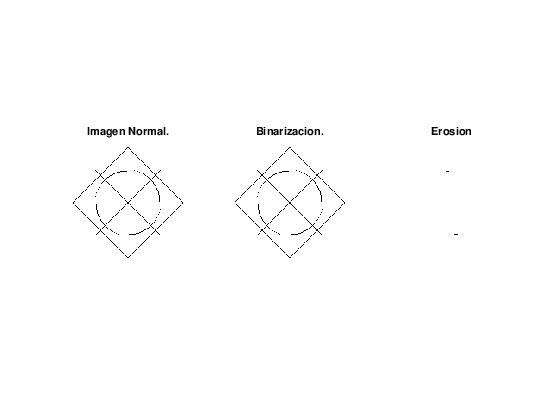

In [34]:
Erosion(IMG, 5, 'lineaH')

    otsuMethod at line 38 column 16
    Dilatacion at line 3 column 11
fDil =  138
cDil =  138
Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
    f   image     128x128                    16384  uint8

Total is 16384 elements using 16384 bytes



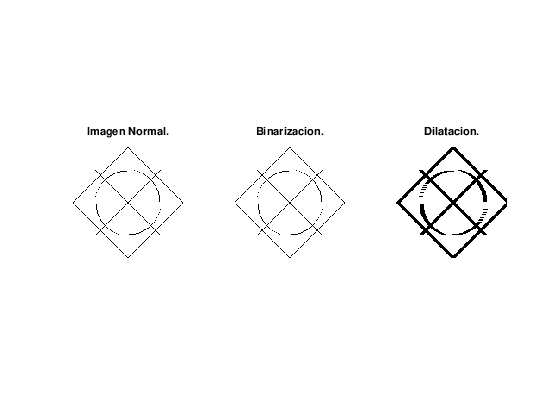

In [35]:
Dilatacion(IMG, 5, 'lineaH')

In [36]:
!ls ./images/

boat.png       coins.png   house.png    imagen2.png  pout.png
cameraman.png  hands1.png  imagen1.png  parrot.png   westconcordorthophoto.png



In [6]:
alt_img = imread('./images/coins.png');

In [14]:
Cierre(alt_img, 7, 'cuadrado')

error: 'Cierre' undefined near line 1 column 1


In [7]:
otsuMethod(alt_img)

    otsuMethod at line 38 column 16
ans =  127


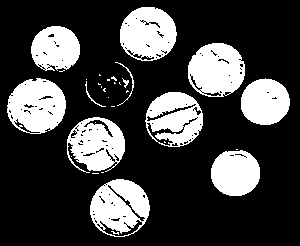

In [13]:
imshow(Binarization(alt_img, 160))

In [18]:
function output = SE_Square_Dilatation(matrix, radio, posX, posY);
radio__ = round(radio/2)-1;

minX = posX - radio__;
minY = posY - radio__;

for i = 1 : radio
    for j = 1 : radio
        matrix(minX + i-1,minY + j-1) = 0;
    end
end

output = matrix;
end

In [19]:
function output = SE_HorizontalLine_Dilatation(matrixIn, radio, posX, posY);

for i=1:radio
    matrixIn(posX,posY+i-1) = 0;
end

output = matrixIn;
end

In [20]:
function output = SE_Square_Erosion(matrixIn, radio);
aux = round(radio/2);
contSE = (radio*2)-1;
contVer = 0;
band = false;
nSquare = radio*radio;

for i=1:radio
    for j=1:radio
        SE(i,j) = 0;
    end
end

for i=1:radio
    for j=1:radio
        if matrixIn(i,j) == 0 
            contVer = contVer + 1;
        end
    end
end

if contVer == nSquare 
    band = true;
end


output = band;
end

In [21]:
function output = SE_HorizontalLine_Erosion(matrixIn, radio);
contVer = 0;
band = false;

for j=1:radio
    if matrixIn(1,j) == 0
       contVer = contVer + 1;
    end
end


if contVer == radio 
    band = true;
end


output = band;
end

In [22]:
function output = SE_Cross_Erosion(matrixIn, radio);
aux = round(radio/2);
contSE = (radio*2)-1;
contVer = 0;
band = false;

for i=1:radio
    for j=1:radio
        SE(i,j) = 255;
    end
end

for i=1:radio
    SE(aux,i) = 0;
    SE(i,aux) = 0;
end

for i=1:radio
    for j=1:radio
        if matrixIn(i,j) == 0 && SE(i,j) == 0
            contVer = contVer + 1;
        end
    end
end

if contVer == contSE 
    band = true;
end


output = band;
end

In [23]:
function output = SE_Cross_Dilatation(matrix, radio, posX, posY);
radio__ = round(radio/2)-1;

freeSquares = radio - radio__;
minX = posX - freeSquares;
minY = posY - freeSquares;

for i=1:radio
    matrix(i+minX,posY) = 0; %horizontal
    matrix(posX,i+minY) = 0; %vertical
end

output = matrix;
end

In [24]:
function output = SE_VerticalLine_Dilatation(matrixIn, radio, posX, posY);

for i=1:radio
    matrixIn(i+posX-1,posY) = 0;
end
output = matrixIn;
end

In [25]:
function output = SE_VerticalLine_Erosion(matrixIn, radio);
contVer = 0;
band = false;

for j=1:radio
    if matrixIn(j,1) == 0
       contVer = contVer + 1;
    end
end


if contVer == radio 
    band = true;
end


output = band;
end